### Mopsy and Mocha ####

#### Introduction ###
Here in this machine learning project, we will be using the concept of convolutional linear regression, where we will be interaction a set of images, some with a dog and others with a cat. The data set has already been divided into a testing and training set, where we will begin to train a model to identify cats, dogs, and the differences between them.


Below is some code that allows for the importing of all images as a Numpy array, for which the skimage library was used. First, all related libraries were imported.

In [43]:
import sys, os
import skimage.io, skimage.color
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

This function returns the shape of an image, given a folder path and a filename. This is returned as a Numpy array.

In [2]:
def get_image_resolution(folder, file):
    full_path = os.path.join(folder, file)
    img_data = skimage.io.imread(full_path)
    bw_data = skimage.color.rgb2gray(img_data)
    return bw_data.shape

As a proof of concept to show that pictures could be read, all training dog pictures were opened into a Numpy array, where the `get_image_resolution()` function extracted the shape as long as the image is opened. Only one folder is needed for this proof of concept.

In [3]:
# First, we need to get every single file.
training_dog_folder = "training_set/dogs"
test_dog_folder = "test_set/dogs"
training_cat_folder = "training_set/cats"
test_cat_folder = "test_set/cats"

training_dog_paths = os.listdir(training_dog_folder)
training_dog_resolutions = [get_image_resolution(training_dog_folder, i) for i in training_dog_paths]

print(training_dog_resolutions)

[(239, 300), (375, 499), (474, 337), (343, 349), (349, 238), (467, 499), (375, 499), (332, 500), (375, 499), (387, 499), (152, 169), (309, 296), (175, 174), (479, 340), (425, 400), (275, 268), (375, 499), (499, 375), (333, 499), (257, 238), (425, 328), (377, 499), (500, 376), (499, 375), (331, 500), (499, 411), (194, 400), (444, 500), (399, 267), (384, 500), (387, 474), (485, 480), (375, 499), (248, 375), (431, 500), (418, 411), (500, 443), (382, 286), (374, 500), (376, 368), (373, 500), (374, 500), (335, 448), (500, 366), (382, 350), (500, 391), (374, 500), (374, 500), (499, 486), (170, 250), (474, 393), (359, 480), (374, 500), (498, 500), (374, 500), (375, 499), (348, 450), (332, 500), (375, 499), (374, 500), (191, 320), (388, 500), (454, 499), (174, 141), (374, 500), (450, 446), (500, 316), (120, 159), (359, 336), (487, 499), (231, 310), (500, 395), (418, 499), (499, 489), (499, 420), (50, 57), (445, 289), (334, 499), (499, 494), (390, 292), (288, 384), (500, 385), (281, 300), (375,

With these resolutions, next week, the resolutions will be filtered using a histogram, so comparisons can only be made between similarly sized pictures. Since reading these resolutions requires getting the shape of each Numpy array of pixels, it indicates that every image file in a folder of pictures was opened.

Our progress is available at https://github.com/andy64734/all-might.

Below is a function that creates a DataFrame, which contains each path of an image, alongside its horizontal and vertical resolution. The folder name as well as the file names and resolutions need to be passed in.

In [4]:
"""
Generates a Pandas DataFrame, corresponding all the paths and resolutions
into appropriate columns.
"""
def generate_df(folder, files, reses):
    horiz = [i[0] for i in reses]
    vert = [i[1] for i in reses]
    
    paths = [os.path.join(folder, i) for i in files]
    
    df = pd.DataFrame({'path': paths, 'horiz': horiz, 'vert': vert })    
    return df

A DataFrame was first created for all training dog pictures, and the DataFrame shown.

In [5]:
training_dog_df = generate_df(training_dog_folder, training_dog_paths, training_dog_resolutions)
print(training_dog_df)

                                path  horiz  vert
0     training_set/dogs/dog.2241.jpg    239   300
1     training_set/dogs/dog.3789.jpg    375   499
2     training_set/dogs/dog.2498.jpg    474   337
3     training_set/dogs/dog.3432.jpg    343   349
4      training_set/dogs/dog.728.jpg    349   238
5     training_set/dogs/dog.2129.jpg    467   499
6     training_set/dogs/dog.2477.jpg    375   499
7     training_set/dogs/dog.2920.jpg    332   500
8     training_set/dogs/dog.3747.jpg    375   499
9      training_set/dogs/dog.820.jpg    387   499
10     training_set/dogs/dog.712.jpg    152   169
11    training_set/dogs/dog.3866.jpg    309   296
12    training_set/dogs/dog.1573.jpg    175   174
13    training_set/dogs/dog.3379.jpg    479   340
14     training_set/dogs/dog.749.jpg    425   400
15    training_set/dogs/dog.3516.jpg    275   268
16    training_set/dogs/dog.1358.jpg    375   499
17    training_set/dogs/dog.2132.jpg    499   375
18    training_set/dogs/dog.3214.jpg    333   499


In this DataFrame, each image has a different resolution. In order to do convolutional logistic regression, each image must be of the same size. In order to ensure this, the resolutions needed to be explored. Therefore, a 2-dimensional histogram was used to show the tendency.

{'figure.facecolor': 'white',
 'text.color': '.15',
 'axes.labelcolor': '.15',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.linestyle': '-',
 'lines.solid_capstyle': 'round',
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.linewidth': 0,
 'grid.color': 'white',
 'xtick.major.size': 0,
 'ytick.major.size': 0,
 'xtick.minor.size': 0,
 'ytick.minor.size': 0}

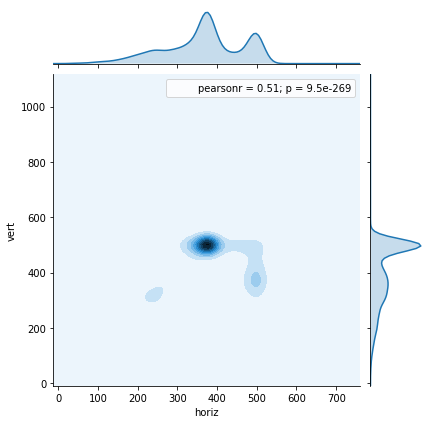

In [7]:
sns.jointplot(training_dog_df['horiz'], training_dog_df['vert'], kind="kde")
sns.axes_style("darkgrid")

There appeared to be the most images at horizontal resolutions around 370x500. This was further explored by determining the most common resolution. The `pd.Series.mode()` method could be used. Since all the resolutions were only a list of tuples, this needed to be converted into a Pandas series in order to gain access to the `mode()` method.

In [6]:
training_dog_reses_series = pd.Series(training_dog_resolutions)
print(training_dog_reses_series.mode())

0    (374, 500)
dtype: object


It was found that for all training dogs, that the most common resolution was 374x500. For future times this operation needs to be used, this was made into a funciton.

In [8]:
def get_most_common_res(reses):
    reses_series = pd.Series(reses)
    return reses_series.mode()[0]

Below is another function, responsible for filtering out all images that do not match a specific resolution.

In [9]:
def filter_df_by_res(df, horiz, vert):
    df = df[df['horiz'] == horiz]
    df = df[df['vert'] == vert]
    return df

A "mask" created from the calculated most common resolution was used to ensure that the DataFrame of training dog images matched the exact desired resolution. This mask was really the resolution tuple containing the horizontal and vertical resolutions. These two resolution dimensions were passed into `filter_df_by_res()`.

In [10]:
training_dog_res_mask = get_most_common_res(training_dog_resolutions)
training_dog_df = filter_df_by_res(training_dog_df, 
                                   training_dog_res_mask[0], 
                                   training_dog_res_mask[1])

To determine whether there is a sufficient number of pictures, the dimensions of the new DataFrame was determined, and the DataFrame printed.

In [11]:
print(training_dog_df.shape)
training_dog_df

(450, 3)


path  horiz  vert
38    training_set/dogs/dog.2995.jpg    374   500
41    training_set/dogs/dog.3537.jpg    374   500
46    training_set/dogs/dog.3329.jpg    374   500
47    training_set/dogs/dog.2583.jpg    374   500
52    training_set/dogs/dog.3577.jpg    374   500
54     training_set/dogs/dog.842.jpg    374   500
59    training_set/dogs/dog.3312.jpg    374   500
64    training_set/dogs/dog.3674.jpg    374   500
97    training_set/dogs/dog.1523.jpg    374   500
99    training_set/dogs/dog.3166.jpg    374   500
102   training_set/dogs/dog.2487.jpg    374   500
110   training_set/dogs/dog.2086.jpg    374   500
156   training_set/dogs/dog.2216.jpg    374   500
160     training_set/dogs/dog.89.jpg    374   500
177   training_set/dogs/dog.1571.jpg    374   500
194   training_set/dogs/dog.3162.jpg    374   500
208   training_set/dogs/dog.2563.jpg    374   500
212   training_set/dogs/dog.3157.jpg    374   500
215   training_set/dogs/dog.1292.jpg    374   500
225    training_set/dogs/dog.489.jpg    374   500
227   training_set/dogs/dog.1600.jpg    374   500
236    training_set/dogs/dog.654.jpg    374   500
249   training_set/dogs/dog.3327.jpg    374   500
264   training_set/dogs/dog.3618.jpg    374   500
316   training_set/dogs/dog.2726.jpg    374   500
320   training_set/dogs/dog.3265.jpg    374   500
321    training_set/dogs/dog.733.jpg    374   500
323   training_set/dogs/dog.2190.jpg    374   500
327   training_set/dogs/dog.1470.jpg    374   500
330   training_set/dogs/dog.2486.jpg    374   500
...                              ...    ...   ...
3701  training_set/dogs/dog.1857.jpg    374   500
3709  training_set/dogs/dog.1959.jpg    374   500
3714   training_set/dogs/dog.606.jpg    374   500
3715  training_set/dogs/dog.1925.jpg    374   500
3735  training_set/dogs/dog.3458.jpg    374   500
3757  training_set/dogs/dog.3305.jpg    374   500
3791  training_set/dogs/dog.3908.jpg    374   500
3793   training_set/dogs/dog.357.jpg    374   500
3795  training_set/dogs/dog.3752.jpg    374   500
3804  training_set/dogs/dog.3707.jpg    374   500
3816  training_set/dogs/dog.2187.jpg    374   500
3821   training_set/dogs/dog.151.jpg    374   500
3828  training_set/dogs/dog.3879.jpg    374   500
3831   training_set/dogs/dog.802.jpg    374   500
3832  training_set/dogs/dog.1653.jpg    374   500
3841  training_set/dogs/dog.3564.jpg    374   500
3848   training_set/dogs/dog.526.jpg    374   500
3867  training_set/dogs/dog.2806.jpg    374   500
3874  training_set/dogs/dog.1802.jpg    374   500
3886  training_set/dogs/dog.3165.jpg    374   500
3890  training_set/dogs/dog.1859.jpg    374   500
3894  training_set/dogs/dog.3099.jpg    374   500
3909   training_set/dogs/dog.378.jpg    374   500
3911  training_set/dogs/dog.2159.jpg    374   500
3923  training_set/dogs/dog.2253.jpg    374   500
3924  training_set/dogs/dog.1565.jpg    374   500
3925   training_set/dogs/dog.213.jpg    374   500
3931   training_set/dogs/dog.941.jpg    374   500
3946  training_set/dogs/dog.1534.jpg    374   500
3974  training_set/dogs/dog.3494.jpg    374   500

[450 rows x 3 columns]

<p>Since there were still 450 remaining images in this model, there were enough dog images to create the model.</p>

<p>This same process was repeated for test dogs, training cats, and test cats. To abbreviate the creation of data frames, all the above operations were compressed into a `generate_optimal_df`, where only a folder path is needed to create a DataFrame of the most common resolution. The most common resolution was also printed alongside the execution of the function for each call.</p>

In [12]:
def generate_optimal_df(folder):
    paths = os.listdir(folder)
    reses = [get_image_resolution(folder, i) for i in paths]
    df = generate_df(folder, paths, reses)
    opt_res = get_most_common_res(reses)
    print("Optimal resolution for " + folder + " is " + str(opt_res))
    
    HORIZ_INDEX = 0
    VERT_INDEX = 1
    
    df = df[df['horiz'] == opt_res[HORIZ_INDEX]][df['vert'] == opt_res[VERT_INDEX]]
    return df

Below is the execution of the function for test dogs.

In [13]:
test_dog_df = generate_optimal_df(test_dog_folder)
test_dog_df

Optimal resolution for test_set/dogs is (374, 500)


/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


path  horiz  vert
0       test_set/dogs/dog.4180.jpg    374   500
26      test_set/dogs/dog.4782.jpg    374   500
36      test_set/dogs/dog.4925.jpg    374   500
38      test_set/dogs/dog.4614.jpg    374   500
45      test_set/dogs/dog.4901.jpg    374   500
66      test_set/dogs/dog.4452.jpg    374   500
72      test_set/dogs/dog.4747.jpg    374   500
79      test_set/dogs/dog.4310.jpg    374   500
80      test_set/dogs/dog.4404.jpg    374   500
152     test_set/dogs/dog.4463.jpg    374   500
153     test_set/dogs/dog.4711.jpg    374   500
157     test_set/dogs/dog.4755.jpg    374   500
159     test_set/dogs/dog.4062.jpg    374   500
175     test_set/dogs/dog.4407.jpg    374   500
184     test_set/dogs/dog.4083.jpg    374   500
209     test_set/dogs/dog.4025.jpg    374   500
214     test_set/dogs/dog.4732.jpg    374   500
223     test_set/dogs/dog.4096.jpg    374   500
229     test_set/dogs/dog.4314.jpg    374   500
232     test_set/dogs/dog.4525.jpg    374   500
233     test_set/dogs/dog.4250.jpg    374   500
270     test_set/dogs/dog.4217.jpg    374   500
283     test_set/dogs/dog.4624.jpg    374   500
285     test_set/dogs/dog.4846.jpg    374   500
306  test_set/dogs/dog.4171(1).jpg    374   500
308     test_set/dogs/dog.4619.jpg    374   500
310     test_set/dogs/dog.4945.jpg    374   500
311     test_set/dogs/dog.4601.jpg    374   500
314     test_set/dogs/dog.4376.jpg    374   500
317     test_set/dogs/dog.4737.jpg    374   500
..                             ...    ...   ...
733     test_set/dogs/dog.4681.jpg    374   500
743     test_set/dogs/dog.4319.jpg    374   500
753     test_set/dogs/dog.4341.jpg    374   500
758     test_set/dogs/dog.4663.jpg    374   500
763     test_set/dogs/dog.4152.jpg    374   500
771     test_set/dogs/dog.4046.jpg    374   500
778     test_set/dogs/dog.4222.jpg    374   500
790     test_set/dogs/dog.4697.jpg    374   500
794     test_set/dogs/dog.4049.jpg    374   500
795  test_set/dogs/dog.4159(1).jpg    374   500
802     test_set/dogs/dog.4802.jpg    374   500
818     test_set/dogs/dog.4748.jpg    374   500
820     test_set/dogs/dog.4974.jpg    374   500
829     test_set/dogs/dog.4834.jpg    374   500
855     test_set/dogs/dog.4068.jpg    374   500
860     test_set/dogs/dog.4519.jpg    374   500
870     test_set/dogs/dog.4879.jpg    374   500
873     test_set/dogs/dog.4804.jpg    374   500
875     test_set/dogs/dog.5000.jpg    374   500
892     test_set/dogs/dog.4923.jpg    374   500
893     test_set/dogs/dog.4861.jpg    374   500
907     test_set/dogs/dog.4847.jpg    374   500
909     test_set/dogs/dog.4377.jpg    374   500
912     test_set/dogs/dog.4140.jpg    374   500
948     test_set/dogs/dog.4158.jpg    374   500
949     test_set/dogs/dog.4102.jpg    374   500
972     test_set/dogs/dog.4313.jpg    374   500
976     test_set/dogs/dog.4021.jpg    374   500
984     test_set/dogs/dog.4019.jpg    374   500
988     test_set/dogs/dog.4169.jpg    374   500

[108 rows x 3 columns]

In [14]:
test_dog_df.shape

(108, 3)

There were 108 dogs, which was enough for testing the model for dogs.

This was repeated for the training and testing set of cats. Ultimately, there were 506 training cats and 137 test cats at the optimal resolution.

In [15]:
training_cat_df = generate_optimal_df(training_cat_folder)
training_cat_df.shape

Optimal resolution for training_set/cats is (375, 499)


/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


(506, 3)

In [16]:
test_cat_df = generate_optimal_df(test_cat_folder)
test_cat_df.shape

Optimal resolution for test_set/cats is (374, 500)


/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


(137, 3)

Despite the reasonable sizes of the cat training and test sets, it was later discovered that all mode resolutions matched the 374x500 resolution, except for training cats. Training cats was at 375x499, which did not match. A new DataFrame was made for training cats at the desired 374x500 resolution.

In [17]:
paths = os.listdir(training_cat_folder)
reses = [get_image_resolution(training_cat_folder, i) for i in paths]
df = generate_df(training_cat_folder, paths, reses)
opt_res = (374, 500)
print("Optimal resolution for " + training_cat_folder + " is " + str(opt_res))

HORIZ_INDEX = 0
VERT_INDEX = 1

df = df[df['horiz'] == opt_res[HORIZ_INDEX]][df['vert'] == opt_res[VERT_INDEX]]
df

Optimal resolution for training_set/cats is (374, 500)


/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


path  horiz  vert
9     training_set/cats/cat.2457.jpg    374   500
12    training_set/cats/cat.3718.jpg    374   500
15    training_set/cats/cat.1524.jpg    374   500
35    training_set/cats/cat.3752.jpg    374   500
54    training_set/cats/cat.1256.jpg    374   500
60     training_set/cats/cat.585.jpg    374   500
63     training_set/cats/cat.553.jpg    374   500
73    training_set/cats/cat.3792.jpg    374   500
74    training_set/cats/cat.1599.jpg    374   500
82    training_set/cats/cat.1312.jpg    374   500
83     training_set/cats/cat.160.jpg    374   500
101   training_set/cats/cat.2748.jpg    374   500
105   training_set/cats/cat.3879.jpg    374   500
106   training_set/cats/cat.1254.jpg    374   500
122   training_set/cats/cat.2762.jpg    374   500
128    training_set/cats/cat.169.jpg    374   500
142    training_set/cats/cat.917.jpg    374   500
152    training_set/cats/cat.668.jpg    374   500
171   training_set/cats/cat.2476.jpg    374   500
184   training_set/cats/cat.3272.jpg    374   500
185   training_set/cats/cat.1713.jpg    374   500
194   training_set/cats/cat.3403.jpg    374   500
198   training_set/cats/cat.3644.jpg    374   500
206    training_set/cats/cat.141.jpg    374   500
241   training_set/cats/cat.3335.jpg    374   500
244   training_set/cats/cat.2772.jpg    374   500
252   training_set/cats/cat.2333.jpg    374   500
261   training_set/cats/cat.1557.jpg    374   500
263   training_set/cats/cat.1988.jpg    374   500
264   training_set/cats/cat.1503.jpg    374   500
...                              ...    ...   ...
3717  training_set/cats/cat.3621.jpg    374   500
3719  training_set/cats/cat.2732.jpg    374   500
3746  training_set/cats/cat.1260.jpg    374   500
3747  training_set/cats/cat.3901.jpg    374   500
3768  training_set/cats/cat.2749.jpg    374   500
3776  training_set/cats/cat.3577.jpg    374   500
3778  training_set/cats/cat.3625.jpg    374   500
3781   training_set/cats/cat.815.jpg    374   500
3783  training_set/cats/cat.2916.jpg    374   500
3809  training_set/cats/cat.2547.jpg    374   500
3821  training_set/cats/cat.3254.jpg    374   500
3832   training_set/cats/cat.308.jpg    374   500
3835  training_set/cats/cat.2891.jpg    374   500
3851  training_set/cats/cat.3958.jpg    374   500
3877  training_set/cats/cat.2556.jpg    374   500
3881  training_set/cats/cat.3541.jpg    374   500
3882   training_set/cats/cat.560.jpg    374   500
3888  training_set/cats/cat.2334.jpg    374   500
3903  training_set/cats/cat.3186.jpg    374   500
3906  training_set/cats/cat.1330.jpg    374   500
3939   training_set/cats/cat.281.jpg    374   500
3945   training_set/cats/cat.228.jpg    374   500
3952  training_set/cats/cat.1921.jpg    374   500
3961  training_set/cats/cat.2206.jpg    374   500
3983  training_set/cats/cat.2156.jpg    374   500
3984  training_set/cats/cat.1070.jpg    374   500
3986  training_set/cats/cat.1793.jpg    374   500
3988  training_set/cats/cat.3004.jpg    374   500
3989  training_set/cats/cat.2323.jpg    374   500
3993  training_set/cats/cat.2315.jpg    374   500

[490 rows x 3 columns]

While there were not as many images at this resolution, 490 images were still plenty for the purpose of this experiment. The training cat DataFrame was overwritten with images at the proper resolution.

In [18]:
# Overwrite training_cat_df with 374x500 resolution pictures.
training_cat_df = df

<p>Next, all dog and cat training images needed to be added to a Numpy array in order to be prepared for a logistical regression. In order to do so, each image 2D array of pixels needed to be imported, and be understood as being in grayscale. Also, for logistical regression, each image needed to be flattened, so that each pixel can get its own "column" of data. Each flattened image is added, so there is a 2D Numpy array of training images.</p>

<p>Alongside the images is an identification of whether the animal is a dog (1) or is a cat (0).</p>

In [19]:
training_animals = np.zeros(1)
training_imgs = np.zeros((1, 374*500))

# Add all the dog images.
for file in training_dog_df['path']:
    img = skimage.io.imread(file, as_grey = True)
    img_squished = np.array([img.flatten()])
    training_imgs = np.append(training_imgs, img_squished, axis=0)
    training_animals = np.append(training_animals, 1)
    
# Add all the cat images.
for file in training_cat_df['path']:
    img = skimage.io.imread(file, as_grey = True)
    img_squished = np.array([img.flatten()])
    training_imgs = np.append(training_imgs, img_squished, axis=0)
    training_animals = np.append(training_animals, 0)

# Delete the 0 value we created as part of a mold.
training_animals = np.delete(training_animals, 0)
training_imgs = np.delete(training_imgs, 0, axis=0)

Both of the created arrays were then placed into a `SGDClassifider` for logistical regression.

In [22]:
lr = SGDClassifier(max_iter=10000, loss="log")
lr.fit(training_imgs, training_animals)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=10000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [23]:
training_imgs.shape

(940, 187000)

In [24]:
test_animals = np.zeros(1)
test_imgs = np.zeros((1, 374*500))

# Add all the dog images.
for file in test_dog_df['path']:
    img = skimage.io.imread(file, as_grey = True)
    img_squished = np.array([img.flatten()])
    test_imgs = np.append(test_imgs, img_squished, axis=0)
    test_animals = np.append(test_animals, 1)
    
# Add all the cat images.
for file in test_cat_df['path']:
    img = skimage.io.imread(file, as_grey = True)
    img_squished = np.array([img.flatten()])
    test_imgs = np.append(test_imgs, img_squished, axis=0)
    test_animals = np.append(test_animals, 0)

# Delete the 0 value we created as part of a mold.
test_animals = np.delete(test_animals, 0)
test_imgs = np.delete(test_imgs, 0, axis=0)

ROC AUC score: 0.5071640984049743
Final confusion matrix: 
[[73 64]
 [56 52]]


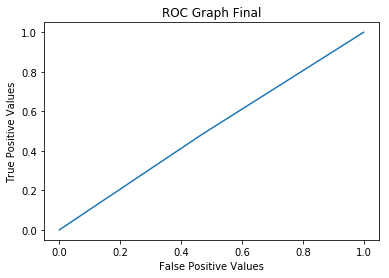

In [45]:
pred_animals = lr.predict(test_imgs)
pred_prob = lr.predict_proba(test_imgs)

auc_score = roc_auc_score(test_animals, pred_animals)
print("ROC AUC score: " + str(auc_score))

accuracy = accuracy_score(test_animals, pred_animals)
fpr, tpr, thresholds = roc_curve(test_animals, pred_animals, pos_label=1)

cm_final = confusion_matrix(test_animals, pred_animals)
print("Final confusion matrix: \n" + str(cm_final))

plt.plot(fpr, tpr)
plt.title("ROC Graph Final")
plt.xlabel("False Positive Values")
plt.ylabel("True Positive Values")
plt.show()


In [37]:
print(accuracy)

0.5102040816326531
